In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.ndimage.filters import gaussian_filter
import matplotlib.cm as cm
from matplotlib.pyplot import imread
from matplotlib.colors import Normalize

# 数据文件探索

In [2]:
!ls ../input/

aggregate  deaths  erangel.jpg	miramar.jpg


agg_match_stats_0.csv  agg_match_stats_2.csv  agg_match_stats_4.csv
agg_match_stats_1.csv  agg_match_stats_3.csv
kill_match_stats_final_0.csv  kill_match_stats_final_3.csv
kill_match_stats_final_1.csv  kill_match_stats_final_4.csv
kill_match_stats_final_2.csv


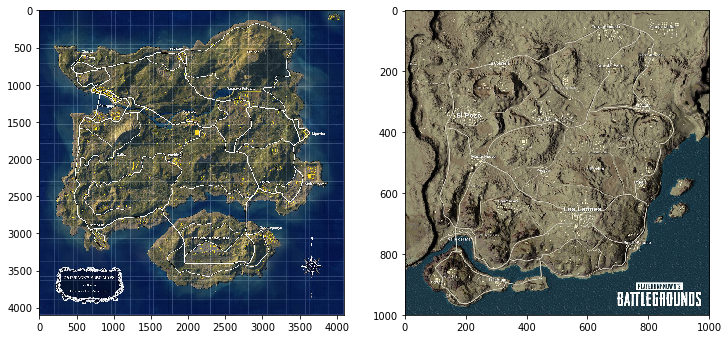

In [3]:
!ls ../input/aggregate/
!ls ../input/deaths/

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.imshow(plt.imread('../input/erangel.jpg'))
plt.subplot(1, 2, 2)
plt.imshow(plt.imread('../input/miramar.jpg'))
plt.show()

In [4]:
!du -sh ../input/aggregate/agg_match_stats_0.csv

2.1G	../input/aggregate/agg_match_stats_0.csv


# 数据探索

### 数据读取

In [5]:
import pandas as pd
df_data_aggregate = pd.read_csv('../input/aggregate/agg_match_stats_0.csv')
df_data_deaths = pd.read_csv('../input/deaths/kill_match_stats_final_0.csv')

### 数据查看

In [6]:
df_data_aggregate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13849287 entries, 0 to 13849286
Data columns (total 15 columns):
date                   object
game_size              int64
match_id               object
match_mode             object
party_size             int64
player_assists         int64
player_dbno            int64
player_dist_ride       float64
player_dist_walk       float64
player_dmg             int64
player_kills           int64
player_name            object
player_survive_time    float64
team_id                int64
team_placement         int64
dtypes: float64(3), int64(8), object(4)
memory usage: 1.5+ GB


In [7]:
df_data_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13426348 entries, 0 to 13426347
Data columns (total 12 columns):
killed_by            object
killer_name          object
killer_placement     float64
killer_position_x    float64
killer_position_y    float64
map                  object
match_id             object
time                 int64
victim_name          object
victim_placement     float64
victim_position_x    float64
victim_position_y    float64
dtypes: float64(6), int64(1), object(5)
memory usage: 1.2+ GB


In [8]:
for column in df_data_aggregate.columns:
    print(column)
    
print('*' * 20)

for column in df_data_deaths.columns:
    print(column)

date
game_size
match_id
match_mode
party_size
player_assists
player_dbno
player_dist_ride
player_dist_walk
player_dmg
player_kills
player_name
player_survive_time
team_id
team_placement
********************
killed_by
killer_name
killer_placement
killer_position_x
killer_position_y
map
match_id
time
victim_name
victim_placement
victim_position_x
victim_position_y


In [9]:
df_data_aggregate.head()

,date,game_size,match_id,match_mode,party_size,player_assists,player_dbno,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_name,player_survive_time,team_id,team_placement
0,2017-11-26T20:59:40+0000,37,2U4GBNA0YmnNZYkzjkfgN4ev-hXSrak_BSey_YEG6kIuDG...,tpp,2,0,1,2870.72400,1784.847780,117,1,SnuffIes,1106.320,4,18
1,2017-11-26T20:59:40+0000,37,2U4GBNA0YmnNZYkzjkfgN4ev-hXSrak_BSey_YEG6kIuDG...,tpp,2,0,1,2938.40723,1756.079710,127,1,Ozon3r,1106.315,4,18
2,2017-11-26T20:59:40+0000,37,2U4GBNA0YmnNZYkzjkfgN4ev-hXSrak_BSey_YEG6kIuDG...,tpp,2,0,0,0.00000,224.157562,67,0,bovize,235.558,5,33
3,2017-11-26T20:59:40+0000,37,2U4GBNA0YmnNZYkzjkfgN4ev-hXSrak_BSey_YEG6kIuDG...,tpp,2,0,0,0.00000,92.935150,0,0,sbahn87,197.553,5,33
4,2017-11-26T20:59:40+0000,37,2U4GBNA0YmnNZYkzjkfgN4ev-hXSrak_BSey_YEG6kIuDG...,tpp,2,0,0,2619.07739,2510.447000,175,2,GeminiZZZ,1537.495,14,11


In [10]:
df_data_deaths.head()

,killed_by,killer_name,killer_placement,killer_position_x,killer_position_y,map,match_id,time,victim_name,victim_placement,victim_position_x,victim_position_y
0,Grenade,KrazyPortuguese,5.0,657725.10,146275.2,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,823,KrazyPortuguese,5.0,657725.10,146275.2
1,SCAR-L,nide2Bxiaojiejie,31.0,93091.37,722236.4,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,194,X3evolution,33.0,92238.68,723375.1
2,S686,Ascholes,43.0,366921.40,421623.9,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,103,CtrlZee,46.0,367304.50,421216.1
3,Down and Out,Weirdo7777,9.0,472014.20,313274.8,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,1018,BlackDpre,13.0,476645.90,316758.4
4,M416,Solayuki1,9.0,473357.80,318340.5,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,1018,Vjolt,13.0,473588.50,318418.8


### 空值查看

In [11]:
df_data_aggregate[df_data_aggregate.isnull().values == True].drop_duplicates()

,date,game_size,match_id,match_mode,party_size,player_assists,player_dbno,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_name,player_survive_time,team_id,team_placement
252,2017-12-28T09:30:48+0000,48,2U4GBNA0YmnZDcOwRYKzxWhbr5Jaxxjhp0cRvsI40iOQJd...,tpp,2,0,0,2853.272460,3584.870850,13,0,NaN,1494.819,32,3
1505,2017-12-31T13:11:48+0000,28,2U4GBNA0Ymkoxr2BYKn-rNaRztbwuI_vg9q1ls65L42rey...,tpp,4,0,0,0.000000,18.893053,0,0,NaN,137.642,14,24
2349,2017-12-17T06:37:50+0000,63,2U4GBNA0YmmyNWABCuuEotdFnf2pYAu3C5f-JJ9Qv-UyQV...,tpp,1,0,0,0.000000,456.636841,0,0,NaN,1353.599,100069,42
2388,2018-01-08T02:01:25+0000,26,2U4GBNA0YmmGH1I8WFVMw7sv8wSx0Ln8CnZ74JHPXcRUu4...,tpp,4,1,0,3680.699710,2242.188720,2,0,NaN,1148.487,10,2
3539,2017-12-30T10:44:20+0000,85,2U4GBNA0YmkvCmIao1jSik4oZSUnd8bzeMgA1H7GSnDkUa...,tpp,1,0,0,4101.649410,1165.519410,9,0,NaN,947.792,100090,30
4751,2018-01-01T21:32:57+0000,28,2U4GBNA0YmnuJ2AtZa4s3YxcAHVDtQbra_TjEHEAjHBRpw...,tpp,4,0,0,3686.044680,2411.181400,37,0,NaN,1768.519,2,4
4843,2018-01-01T21:32:57+0000,28,2U4GBNA0YmnuJ2AtZa4s3YxcAHVDtQbra_TjEHEAjHBRpw...,tpp,4,2,1,139.196243,3420.635740,216,2,NaN,1872.532,9,2
6029,2017-12-17T05:28:35+0000,28,2U4GBNA0YmnIkC2agUfbPkAgjSdKzB4peHEfhtUOmLKAc8...,tpp,4,0,0,0.000000,106.505150,18,0,NaN,244.523,1,27
6247,2017-12-29T16:34:51+0000,90,2U4GBNA0Ymnp7WwAto9g2slLUaiBKUFaPfS2cP7mxfvB4z...,tpp,1,0,0,0.000000,31.730244,0,0,NaN,137.389,100095,78
6678,2018-01-02T01:30:34+0000,25,2U4GBNA0YmmZIEjplykShOMA4Mm0oQw7-HntKRiIq1vzO0...,tpp,4,0,0,0.000000,468.295200,0,0,NaN,245.970,4,24


In [12]:
df_data_deaths[df_data_deaths.isnull().values == True].drop_duplicates()

,killed_by,killer_name,killer_placement,killer_position_x,killer_position_y,map,match_id,time,victim_name,victim_placement,victim_position_x,victim_position_y
14,Down and Out,UrGrandFather,14.0,535680.8,368517.3,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,751,Pis22,NaN,533947.6,366812.60
35,Down and Out,TONGLIANGZHI,10.0,471184.8,359439.6,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,644,Corleone_Wu,NaN,470963.8,354800.20
36,Grenade,TONGLIANGZHI,10.0,471265.5,359205.4,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,642,SAOZISHUIZHENDUO,NaN,471033.0,354114.80
44,Bluezone,NaN,NaN,NaN,NaN,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,879,xuezhiqian717,26.0,0.0,0.00
65,M416,JoyFeng-,3.0,362688.8,434332.5,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,552,NET_MANHDUNG2,NaN,362263.2,434470.60
69,Down and Out,JoyFeng-,3.0,362936.8,434318.4,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,553,Games_414_TQ1,NaN,362179.2,436248.20
76,Bluezone,NaN,NaN,NaN,NaN,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,1646,zd1994925,7.0,0.0,0.00
77,SCAR-L,Piece_of_Sht,14.0,535194.3,365380.0,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,749,chenpan007,NaN,533893.9,367672.10
78,Down and Out,NaN,NaN,NaN,NaN,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,879,WOJIAOLIGUAPI,26.0,0.0,0.00
116,Falling,NaN,NaN,NaN,NaN,MIRAMAR,2U4GBNA0Yml3HEnAb5HSfMbBgZnnKeFS1Nyxgm5XowlAkE...,864,#unknown,11.0,308988.8,397375.00


### 丢弃空值

In [13]:
df_data_aggregate.drop_duplicates(inplace=True)
df_data_deaths.drop_duplicates(inplace=True)

### 是否吃鸡

In [14]:
df_data_aggregate['won'] = df_data_aggregate['team_placement'] == 1

### 吃鸡率与击杀数关系

Text(0, 0.5, 'probability of No1')

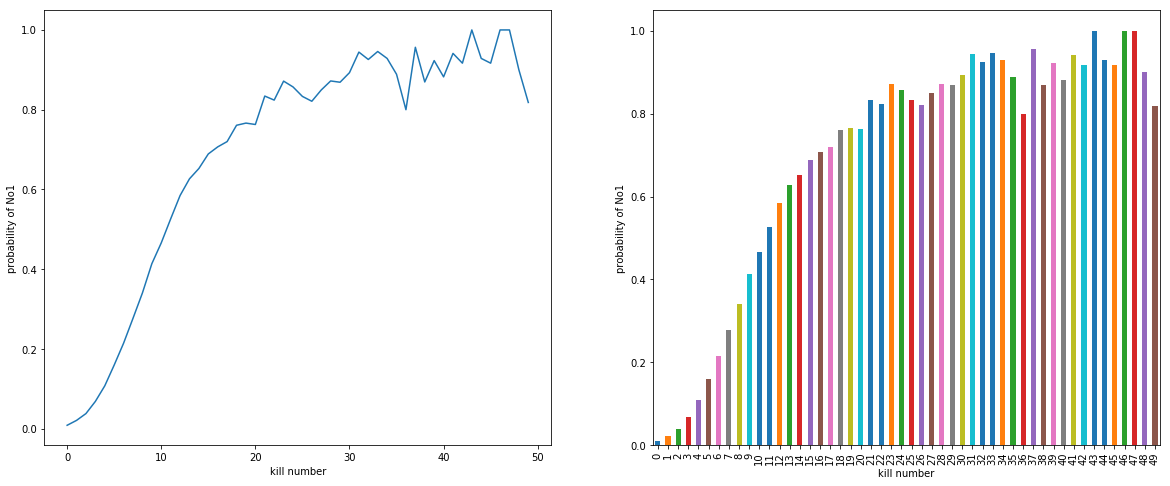

In [15]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
# 剔除击杀数不合理的玩家
df_data_aggregate.loc[df_data_aggregate['player_kills'] < 50, ['player_kills', 'won']].groupby('player_kills')['won'].mean().plot()
plt.xlabel('kill number')
plt.ylabel("probability of No1")
plt.subplot(1, 2, 2)
df_data_aggregate.loc[df_data_aggregate['player_kills'] < 50, ['player_kills', 'won']].groupby('player_kills')['won'].mean().plot.bar()
plt.xlabel('kill number')
plt.ylabel("probability of No1")

### 不同模式吃鸡率

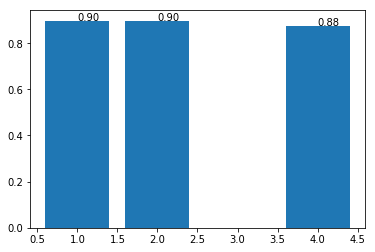

In [16]:
v = df_data_aggregate.groupby('party_size')['player_kills'].mean()
plt.bar(v.index, v.values)
for x, y in zip(v.index, v.values):
    plt.text(x, y, "{:.2f}".format(y))
plt.show()

### 载具移动距离与吃鸡率

Text(0, 0.5, 'prop of No1')

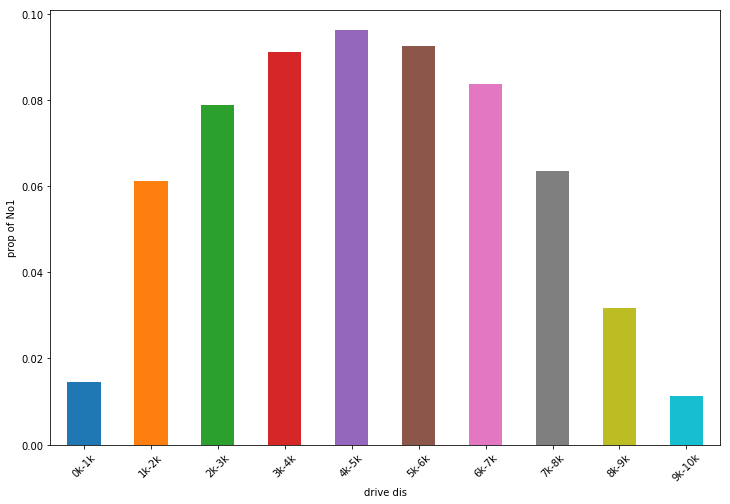

In [17]:
df_ride = df_data_aggregate.loc[df_data_aggregate['player_dist_ride']<20000, ['player_dist_ride', 'won']]
labels=["0k-1k", "1k-2k", "2k-3k", "3k-4k","4k-5k", "5k-6k", "6k-7k", "7k-8k", "8k-9k", "9k-10k"]
df_ride['drive'] = pd.cut(df_ride['player_dist_ride'], 10, labels=labels)
df_ride.groupby('drive').won.mean().plot.bar(rot=45, figsize=(12, 8))
plt.xlabel("drive dis")
plt.ylabel("prop of No1")

### death数据集的探索

In [18]:
df_data_deaths.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13426299 entries, 0 to 13426347
Data columns (total 12 columns):
killed_by            object
killer_name          object
killer_placement     float64
killer_position_x    float64
killer_position_y    float64
map                  object
match_id             object
time                 int64
victim_name          object
victim_placement     float64
victim_position_x    float64
victim_position_y    float64
dtypes: float64(6), int64(1), object(5)
memory usage: 1.3+ GB


In [19]:
df_data_deaths.shape

(13426299, 12)

### 落地成盒在哪里

In [20]:
df_first_die_map1 = df_data_deaths.loc[(df_data_deaths['map'] == 'ERANGEL')&(df_data_deaths['time'] < 150)&(df_data_deaths['victim_position_x']>0), :].dropna()
df_first_die_map2 = df_data_deaths.loc[(df_data_deaths['map'] == 'MIRAMAR')&(df_data_deaths['time'] < 150)&(df_data_deaths['victim_position_x']>0), :].dropna()

In [21]:
position_map1 = df_first_die_map1[['victim_position_x', 'victim_position_y']]
position_map2 = df_first_die_map2[['victim_position_x', 'victim_position_y']]

In [22]:
# 尺度修改为地图尺寸(4096, 4096) (1000, 1000)
position_map1 = position_map1 / 800000 * 4096
position_map2 = position_map2 / 800000 * 1000

In [23]:
def heatmap(x, y, s, bins):
    """
    热度图
    """
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins)
    heatmap = gaussian_filter(heatmap, sigma=s)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    return heatmap.T, extent

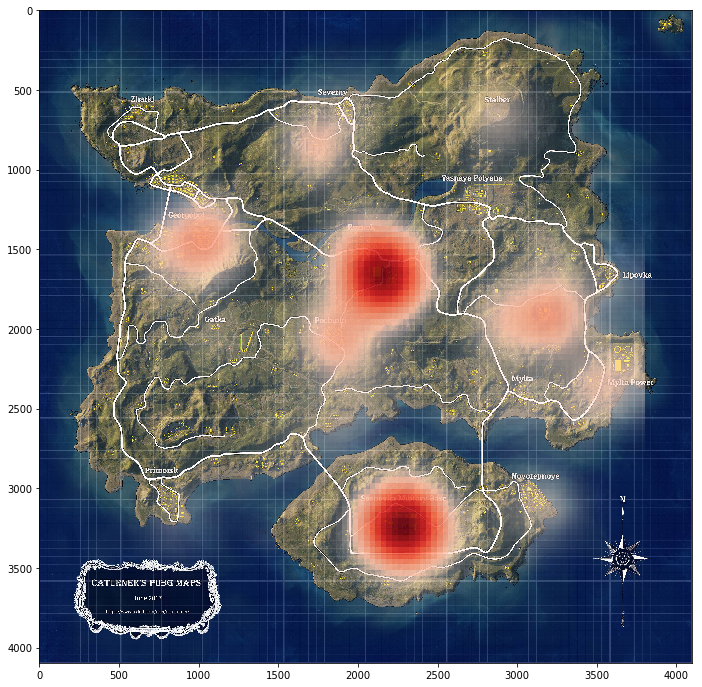

In [25]:
background = imread('../input/erangel.jpg')
hmap, extent = heatmap(position_map1.values[:,0], position_map1.values[:,1], 4.5, 100)
alphas = np.clip(Normalize(0, hmap.max(), clip=True)(hmap)*4.5, 0.0, 1.)
colors = cm.Reds(Normalize(0, hmap.max(), clip=True)(hmap))
colors[..., -1] = alphas

fig, ax = plt.subplots(figsize=(12,12))
ax.set_xlim(0, 4096); ax.set_ylim(0, 4096)
ax.imshow(background)
ax.imshow(colors, extent=extent, origin='lower', cmap=cm.Reds, alpha=0.9)
plt.gca().invert_yaxis()

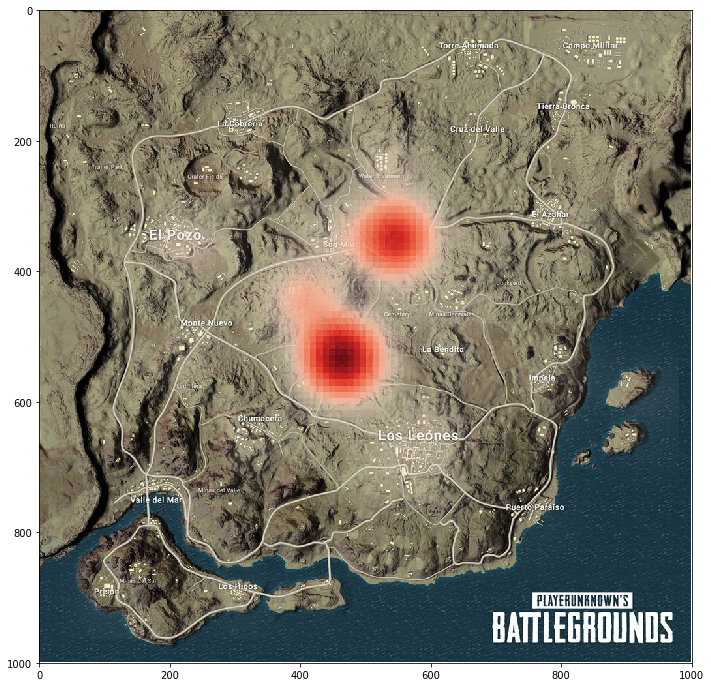

In [26]:
background = imread('../input/miramar.jpg')
hmap, extent = heatmap(position_map2.values[:,0], position_map2.values[:,1], 4, 100)
alphas = np.clip(Normalize(0, hmap.max(), clip=True)(hmap)*4, 0.0, 1.)
colors = cm.Reds(Normalize(0, hmap.max(), clip=True)(hmap))
colors[..., -1] = alphas

fig, ax = plt.subplots(figsize=(12,12))
ax.set_xlim(0, 1000); ax.set_ylim(0, 1000)
ax.imshow(background)
ax.imshow(colors, extent=extent, origin='lower', cmap=cm.Reds, alpha=0.9)
plt.gca().invert_yaxis()